In [16]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
from datetime import date
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import skew
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from scipy import stats
import utility
from scipy import stats

# Zomato

In [21]:
# zomato only
df_zom = pd.read_csv('data/3_clean_zomato_feat_ori_train.csv')
# df_zom = pd.read_csv('data/3_jbdk_clean_zomato_feat.csv')

df_zom['rest_price_idr'] = df_zom['rest_price_idr'] / 1000
df_zom['rest_price_idr'] = df_zom['rest_price_idr'].astype(int)

# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac']

# ori 
drop_column = ['url','index','rating','lat','long','review']
target_column = 'rating'

# filter chain and non chain 
# df_zom = df_zom[df_zom['is_chain']==1]

# cross validation 

rf_param = {'n_estimators':500,'max_features':3, 'max_depth':30,'bootstrap':True}
xgb_param = {'n_estimators':100, 'max_depth':5, 'min_child_weight':3, 'learning_rate':0.15, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':0.1}


result_zomato_loop, result_zomato = utility.bulk_train_k_fold(df_input=df_zom, drop_column=drop_column, target_column=target_column, dataset_name='zomato_only', rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_loop['test_neg_mean_squared_error']= result_zomato_loop['test_neg_mean_squared_error']*-1
result_zomato_loop['test_neg_mean_absolute_error']= result_zomato_loop['test_neg_mean_absolute_error']*-1
result_zomato_loop['feature_size'] = len(df_zom.drop(drop_column, axis=1).columns)
result_zomato_loop['record'] = df_zom.drop(drop_column, axis=1).shape[0]
result_zomato_loop = result_zomato_loop.reset_index()

# Zomato 250 

In [24]:
# zomato geo 250
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_ori_250_sampling_train.csv')
# df_zom_poi = pd.read_csv('data/3_jbdk_clean_zomato_gof_250.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash','encode']

# ori
drop_column = ['url','index','rating','lat','long','review','geohash','encode']

target_column = 'rating'

# filter chain and non chain 
# df_zom_poi = df_zom_poi[df_zom_poi['is_chain']==1]

# cross validation
rf_param = {'n_estimators':250,'max_features':3, 'max_depth':30,'bootstrap':True}
xgb_param = {'n_estimators':100, 'max_depth':5, 'min_child_weight':1, 'learning_rate':0.15, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':0.1}

result_zomato_250_loop,  result_zomato_250  = utility.bulk_train_k_fold(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_poi_250',rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_250_loop['test_neg_mean_squared_error'] = result_zomato_250_loop['test_neg_mean_squared_error']*-1
result_zomato_250_loop['test_neg_mean_absolute_error'] = result_zomato_250_loop['test_neg_mean_absolute_error']*-1
result_zomato_250_loop['feature_size'] = len(df_zom_poi.drop(drop_column, axis=1).columns)
result_zomato_250_loop['record'] = df_zom_poi.drop(drop_column, axis=1).shape[0]

result_zomato_250_loop = result_zomato_250_loop.reset_index()

In [25]:
result_zomato_250_loop

,index,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_r2,train_r2,test_Pearson,train_Pearson,name,dataset,feature_size,record
0,0,1.505835,0.080784,0.055783,-0.027905,0.007600,-0.002022,0.894506,0.970850,0.946552,0.986505,rf,zomato_poi_250,60,8519
1,1,1.699960,0.160877,0.055382,-0.027019,0.007364,-0.001970,0.891919,0.971999,0.945606,0.986956,rf,zomato_poi_250,60,8519
2,2,1.991339,0.082359,0.055538,-0.027345,0.007618,-0.001921,0.889370,0.972600,0.943951,0.987325,rf,zomato_poi_250,60,8519
3,3,1.428149,0.080225,0.056400,-0.027629,0.007707,-0.002017,0.893135,0.970919,0.946044,0.986477,rf,zomato_poi_250,60,8519
4,4,1.378853,0.081457,0.057490,-0.027281,0.007767,-0.002020,0.885734,0.971299,0.941539,0.986619,rf,zomato_poi_250,60,8519
5,0,0.451186,0.005984,0.116181,-0.100113,0.021155,-0.016272,0.706347,0.765377,0.847256,0.883977,xgb,zomato_poi_250,60,8519
6,1,0.454531,0.006017,0.111922,-0.098868,0.019616,-0.015881,0.712079,0.774231,0.847611,0.889025,xgb,zomato_poi_250,60,8519
7,2,0.433067,0.005984,0.114441,-0.098488,0.020710,-0.015875,0.699243,0.773532,0.840978,0.888679,xgb,zomato_poi_250,60,8519
8,3,0.446680,0.006982,0.118485,-0.099311,0.021848,-0.015944,0.697057,0.770077,0.841337,0.886731,xgb,zomato_poi_250,60,8519
9,4,0.434742,0.006023,0.112402,-0.097523,0.019790,-0.015485,0.708862,0.779993,0.845526,0.891968,xgb,zomato_poi_250,60,8519


# Zomato 500 

In [6]:
# zomato geo 500
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_ori_500_sampling_train.csv')
# df_zom_poi = pd.read_csv('data/3_jbdk_clean_zomato_gof_500.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)


# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash','encode']

# ori
drop_column = ['url','index','rating','lat','long','review','geohash','encode']

target_column = 'rating'

# filter chain and non chain 
df_zom_poi = df_zom_poi[df_zom_poi['is_chain']==1]

# cross validation
rf_param = {'n_estimators':500,'max_features':3, 'max_depth':30,'bootstrap':True}
xgb_param = {'n_estimators':100, 'max_depth':5, 'min_child_weight':3, 'learning_rate':0.2, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':0.1}

result_zomato_500_loop,  result_zomato_500 = utility.bulk_train_k_fold(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_poi_500', rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_500_loop['test_neg_mean_squared_error'] = result_zomato_500_loop['test_neg_mean_squared_error']*-1
result_zomato_500_loop['test_neg_mean_absolute_error'] = result_zomato_500_loop['test_neg_mean_absolute_error']*-1
result_zomato_500_loop['feature_size'] = len(df_zom_poi.drop(drop_column, axis=1).columns)
result_zomato_500_loop['record'] = df_zom_poi.drop(drop_column, axis=1).shape[0]

result_zomato_500_loop = result_zomato_500_loop.reset_index()

# Zomato 1000

In [7]:
# zomato geo 1000
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_ori_1000_sampling_train.csv')
# df_zom_poi = pd.read_csv('data/3_jbdk_clean_zomato_gof_1000.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash','encode']

# ori
drop_column = ['url','index','rating','lat','long','review','geohash','encode']
target_column = 'rating'

# filter chain and non chain 
df_zom_poi = df_zom_poi[df_zom_poi['is_chain']==1]

# cross validation
rf_param = {'n_estimators':250,'max_features':3, 'max_depth':250,'bootstrap':True}
xgb_param = {'n_estimators':1100, 'max_depth':2, 'min_child_weight':1, 'learning_rate':0.05, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':100}


result_zomato_1000_loop,  result_zomato_1000 = utility.bulk_train_k_fold(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_poi_1000',rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_1000_loop['test_neg_mean_squared_error'] = result_zomato_1000_loop['test_neg_mean_squared_error']*-1
result_zomato_1000_loop['test_neg_mean_absolute_error'] = result_zomato_1000_loop['test_neg_mean_absolute_error']*-1
result_zomato_1000_loop['feature_size'] = len(df_zom_poi.drop(drop_column, axis=1).columns)
result_zomato_1000_loop['record'] = df_zom_poi.drop(drop_column, axis=1).shape[0]


result_zomato_1000_loop = result_zomato_1000_loop.reset_index()

In [8]:
# cross validation 
df_total_result = pd.concat([result_zomato_loop,result_zomato_250_loop, result_zomato_500_loop, result_zomato_1000_loop])

# train and test 
df_total_normal = pd.concat([result_zomato , result_zomato_250, result_zomato_500, result_zomato_1000])

In [9]:
df_total_normal

,mae,mse,pearson,name,dataset,feature_size,train_size,test_size
0,0.130490,0.028123,0.420742,rf,zomato_only,41,1914,262
1,0.118994,0.024012,0.527824,xgb,zomato_only,41,1914,262
2,0.129834,0.026882,0.453043,svr,zomato_only,41,1914,262
0,0.047183,0.006142,0.955884,rf,zomato_poi_250,60,3593,491
1,0.088864,0.013693,0.899259,xgb,zomato_poi_250,60,3593,491
2,0.154150,0.037438,0.688743,svr,zomato_poi_250,60,3593,491
0,0.036951,0.004330,0.970879,rf,zomato_poi_500,60,3590,490
1,0.062000,0.007775,0.947580,xgb,zomato_poi_500,60,3590,490
2,0.155084,0.038046,0.707819,svr,zomato_poi_500,60,3590,490
0,0.045196,0.006301,0.954857,rf,zomato_poi_1000,60,3582,489


In [10]:
today = date.today()
print("Today's date:", today)

Today's date: 2022-11-25


In [11]:
df_total_result.to_excel('report/ml_perform_crossval_raw_chain_{}.xlsx'.format(today),index=False)
df_total_normal.to_excel('report/ml_perform_normal_chain_{}.xlsx'.format(today),index=False)

In [12]:
df_zom_poi.drop(drop_column, axis=1).columns

Index(['rest_price_idr', 'is_chain', 'alcohol', 'delivery', 'entertainment',
       'indoor seating', 'kid friendly', 'no alcohol available',
       'others_facility', 'outdoor seating', 'parking service', 'praying room',
       'private dining area available', 'self service', 'smoking area',
       'special_meal', 'table booking', 'table booking not available',
       'table reservation required', 'takeaway available', 'asian', 'bakery',
       'beverages', 'cafe', 'coffee', 'desserts', 'drink', 'fast_food',
       'india', 'indonesia_traditional', 'indonesian', 'melayu', 'mid_east',
       'noodle', 'others_type', 'seafood', 'snacks', 'special_food',
       'street_food', 'tea', 'western', 'd_1000_airport', 'd_1000_atm',
       'd_1000_bank', 'd_1000_cafe', 'd_1000_convenience_store',
       'd_1000_gas_station', 'd_1000_hospital', 'd_1000_lodging',
       'd_1000_meal_takeaway', 'd_1000_mosque', 'd_1000_park',
       'd_1000_restaurant', 'd_1000_school', 'd_1000_store',
       'd_10

In [13]:
df_total_result.head()

,index,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_r2,train_r2,test_Pearson,train_Pearson,name,dataset,feature_size,record
0,0,1.005849,0.060844,0.129121,-0.060919,0.027157,-0.006895,0.179334,0.784216,0.456382,0.897943,rf,zomato_only,41,2177
1,1,1.806900,0.108706,0.125572,-0.062643,0.024770,-0.007440,0.254004,0.766978,0.512757,0.888127,rf,zomato_only,41,2177
2,2,1.174376,0.061870,0.118467,-0.064000,0.023277,-0.007778,0.288197,0.757334,0.541090,0.883898,rf,zomato_only,41,2177
3,3,1.197953,0.070785,0.132106,-0.061351,0.027756,-0.007198,0.222379,0.770013,0.487910,0.889566,rf,zomato_only,41,2177
4,4,1.013809,0.058846,0.109658,-0.064200,0.020106,-0.007643,0.230420,0.773042,0.512523,0.891861,rf,zomato_only,41,2177


# Aggregate report 

In [14]:
df_total_result_agg = df_total_result.groupby(['name','dataset','feature_size']).agg({'test_neg_mean_absolute_error':['mean','std','median','var'],'test_neg_mean_squared_error':['mean','std','median','var'],'test_Pearson':['mean','std','median','var']}).reset_index()
df_total_result_agg.columns = ['name','dataset','feature_size','avg_mae','std_mae','med_mae','var_mae','avg_mse','std_mse','med_mse','var_mse','avg_pearson','std_pearson','med_pearson','var_pearson']

df_total_result_agg.to_excel('report/ml_perform_crossval_agg_chain_{}.xlsx'.format(today),index=False)

In [15]:
df_total_result_agg

,name,dataset,feature_size,avg_mae,std_mae,med_mae,var_mae,avg_mse,std_mse,med_mse,var_mse,avg_pearson,std_pearson,med_pearson,var_pearson
0,rf,zomato_only,41,0.122985,0.009022,0.125572,0.000081,0.024613,0.003102,0.024770,9.619319e-06,0.502132,0.031757,0.512523,0.001008
1,rf,zomato_poi_1000,60,0.048257,0.003253,0.048362,0.000011,0.006762,0.000999,0.006278,9.984190e-07,0.952682,0.006722,0.953003,0.000045
2,rf,zomato_poi_250,60,0.053928,0.001236,0.053468,0.000002,0.008215,0.000503,0.008357,2.526954e-07,0.943455,0.002975,0.942939,0.000009
3,rf,zomato_poi_500,60,0.048274,0.001150,0.048899,0.000001,0.006419,0.000419,0.006538,1.752695e-07,0.955058,0.003513,0.953918,0.000012
4,svr,zomato_only,41,0.131003,0.007013,0.132529,0.000049,0.026608,0.002698,0.027529,7.279610e-06,0.420515,0.023352,0.418073,0.000545
5,svr,zomato_poi_1000,60,0.123157,0.004632,0.123686,0.000021,0.025461,0.002900,0.024804,8.412606e-06,0.812877,0.017722,0.804075,0.000314
6,svr,zomato_poi_250,60,0.157099,0.003838,0.156389,0.000015,0.038320,0.001693,0.039132,2.866470e-06,0.699382,0.026411,0.709850,0.000698
7,svr,zomato_poi_500,60,0.153416,0.005110,0.154021,0.000026,0.036354,0.002130,0.037498,4.535514e-06,0.708427,0.025515,0.700045,0.000651
8,xgb,zomato_only,41,0.123277,0.006506,0.123114,0.000042,0.024334,0.002321,0.023958,5.386275e-06,0.501317,0.024512,0.498583,0.000601
9,xgb,zomato_poi_1000,60,0.112842,0.004916,0.114124,0.000024,0.020167,0.001770,0.020100,3.134431e-06,0.852323,0.014152,0.848859,0.000200


<AxesSubplot:title={'center':'Quality'}>

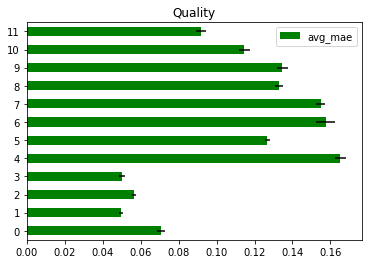

In [16]:
df_total_result_agg.plot(kind = "barh", y = "avg_mae", legend = True, xerr = "std_mae", title = "Quality", color='green')